<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0801/15_2_(solution)model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 성능 평가

## Load model file

In [ ]:
!git clone https://github.com/theAIGuysCode/tensorflow-yolov4-tflite

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 912, done.
remote: Total 912 (delta 0), reused 0 (delta 0), pack-reused 912
Receiving objects: 100% (912/912), 211.46 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (439/439), done.


In [ ]:
%cd /content/tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [ ]:
req_gpu_text = '''tensorflow-gpu==2.5.0
opencv-python==4.7.0.72
lxml
tqdm
absl-py
easydict
pillow
'''

with open('requirements-gpu.txt', 'w') as f:
    f.write(req_gpu_text)

In [ ]:
!pip install -r requirements-gpu.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 88.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462.4 KB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
%cd /content/tensorflow-yolov4-tflite/data

/content/tensorflow-yolov4-tflite/data


In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
%cd /content/tensorflow-yolov4-tflite/data/classes

/content/tensorflow-yolov4-tflite/data/classes


In [ ]:
# 구글 드라이브 파일에서 names을 colab으로 다운로드
!gdown 1Ea9iydXmibS1bDnlVRsPhK4E9r-yifyT

Downloading...
From: https://drive.google.com/uc?id=1Ea9iydXmibS1bDnlVRsPhK4E9r-yifyT
To: /content/tensorflow-yolov4-tflite/data/classes/ClassNames.names
100% 12.0/12.0 [00:00<00:00, 26.6kB/s]


In [ ]:
%cd /content/tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [ ]:
# pb버전의 yolo v4_mask model
!gdown 1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj
From (redirected): https://drive.google.com/uc?id=1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj&confirm=t&uuid=e9d4c692-8b7a-466a-b70b-ad6c1fdd151c
To: /content/tensorflow-yolov4-tflite/yolov4-416.zip
100% 238M/238M [00:01<00:00, 196MB/s]


In [ ]:
!unzip yolov4-416.zip # /content/tensorflow-yolov4-tflite/yolov4-416

Archive:  yolov4-416.zip
   creating: yolov4-416/assets/
  inflating: yolov4-416/saved_model.pb  
   creating: yolov4-416/variables/
  inflating: yolov4-416/variables/variables.data-00000-of-00001  
  inflating: yolov4-416/variables/variables.index  


## Modify config file
- YOLO.CLASSES : 커스텀 데이터셋 파일 경로로 수정

In [ ]:
!pwd

/content/tensorflow-yolov4-tflite


In [ ]:
# yolov4 tensorflow model 실행
!python detect.py --weights ./yolov4-416 --size 416 --model yolov4 --images ./data/images/kite.jpg

2023-04-07 06:00:13.832349: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-07 06:00:15.114658: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-07 06:00:15.139438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 06:00:15.139639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2023-04-07 06:00:15.139686: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-07 06:00:15.164834: I tensorflow/stream_executor/platform/default

## Evaluate pascal voc model

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2022-12-14 03:14:48--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  29.5MB/s    in 16s     

2022-12-14 03:15:05 (27.0 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2022-12-14 03:15:05--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[==========

        VOC           
        ├── test
        |    └──VOCdevkit
        |        └──VOC2007 (from VOCtest_06-Nov-2007.tar)
        └── train
            └──VOCdevkit
                └──VOC2007 (from VOCtrainval_06-Nov-2007.tar)
                └──VOC2012 (from VOCtrainval_11-May-2012.tar)

In [ ]:
!mkdir VOC
!mkdir VOC/train
!mkdir VOC/test

In [ ]:
%cd /content/tensorflow-yolov4-tflite/VOC/test
!tar -xf /content/tensorflow-yolov4-tflite/VOCtest_06-Nov-2007.tar

/content/tensorflow-yolov4-tflite/VOC/test


In [ ]:
%cd /content/tensorflow-yolov4-tflite/VOC/train
!tar -xf /content/tensorflow-yolov4-tflite/VOCtrainval_06-Nov-2007.tar
!tar -xf /content/tensorflow-yolov4-tflite/VOCtrainval_11-May-2012.tar

/content/tensorflow-yolov4-tflite/VOC/train


In [ ]:
%cd /content/tensorflow-yolov4-tflite
!python scripts/voc_annotation.py --data_path VOC

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003167.jpg 235,293,337,362,1 1,96,180,480,14 159,130,238,443,14
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003168.jpg 277,230,499,375,1 29,236,160,375,1 37,82,204,375,14 300,25,497,375,14 365,48,416,80,4
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003169.jpg 28,24,451,333,1
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003171.jpg 137,76,360,220,2
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003176.jpg 31,78,472,231,0 285,214,307,229,6
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003177.jpg 2,31,459,237,0 399,54,500,110,0
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003182.jpg 1,22,500,375,17
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003183.jpg 176,197,374,330,10 169,203,248,329,8 260,208,332,328,8 218,188,283,301,8 286,191,349,301,8
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003184.jpg 152,1,499,375,12
VOC/train/VOCdevkit/VOC2012/JPEGImages/2011_003185.jpg 1,65,500,367,6 50,1,438,333,14
VOC/train/VOCdevkit/V

 ./core/config.py 수정  

        __C.YOLO.CLASSES                = "./data/classes/voc.names"
        __C.TRAIN.ANNOT_PATH            = "./data/dataset/voc_train.txt"
        __C.TEST.ANNOT_PATH             = "./data/dataset/voc_test.txt"

In [ ]:
%cd /content/tensorflow-yolov4-tflite/

/content/tensorflow-yolov4-tflite


In [ ]:
!pwd

/content/tensorflow-yolov4-tflite


In [ ]:
# voc data로 학습된 model을 weights에 할당해줘야 합니다.
!python evaluate.py --weights ./yolov4-416 --annotation_path ./data/dataset/voc_test.txt

2022-12-14 03:53:41.678722: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-14 03:53:41.678769: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 03:53:43.037972: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-14 03:53:43.846173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-12-14 03:53:43.846323: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: lib

In [ ]:
%cd /content/tensorflow-yolov4-tflite/mAP

/content/tensorflow-yolov4-tflite/mAP


In [ ]:
!python main.py

0.00% = aeroplane AP  
0.00% = bicycle AP  
0.00% = bird AP  
0.00% = boat AP  
0.00% = bottle AP  
0.00% = bus AP  
0.00% = car AP  
0.00% = cat AP  
0.00% = chair AP  
0.00% = cow AP  
0.00% = diningtable AP  
0.00% = dog AP  
0.00% = horse AP  
0.00% = motorbike AP  
0.00% = person AP  
0.00% = pottedplant AP  
0.00% = sheep AP  
0.00% = sofa AP  
0.00% = train AP  
0.00% = tvmonitor AP  
mAP = 0.00%
Figure(640x480)


## Download custom-testset

In [ ]:
# custom testset(mask, no-mask)
!gdown 1X5lHjYeyTDSWonC6iuGx9FjHo6qCsKRP

Downloading...
From: https://drive.google.com/uc?id=1X5lHjYeyTDSWonC6iuGx9FjHo6qCsKRP
To: /content/tensorflow-yolov4-tflite/mask_images.zip
100% 3.67M/3.67M [00:00<00:00, 219MB/s]


## Evaluate custom model

In [ ]:
!unzip mask_images.zip

Archive:  mask_images.zip
  inflating: images/0_10725_jpg.rf.99ff78c82dadd6d49408164489cb6582.jpg  
  inflating: images/0_10725_jpg.rf.99ff78c82dadd6d49408164489cb6582.txt  
  inflating: images/0_8w7mkX-PHcfMM5s6_jpeg.rf.74932d662e4077ea5e4374a0038e5757.jpg  
  inflating: images/0_8w7mkX-PHcfMM5s6_jpeg.rf.74932d662e4077ea5e4374a0038e5757.txt  
  inflating: images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg  
  inflating: images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.txt  
  inflating: images/000_1OC3DT_jpg.rf.0570a1f4ab79e324496c311456b6b1f8.jpg  
  inflating: images/000_1OC3DT_jpg.rf.0570a1f4ab79e324496c311456b6b1f8.txt  
  inflating: images/000_1ov3n5_0_jpeg.rf.a23f1c89491779996f4519858277a4e0.jpg  
  inflating: images/000_1ov3n5_0_jpeg.rf.a23f1c89491779996f4519858277a4e0.txt  
  inflating: images/0002526673_jpg.rf.2c547115c01c1b5a10c6d467551f0cae.jpg  
  inflating: images/0002526673_jpg.rf.2c547

In [ ]:
%cd /content

/content


In [ ]:
import glob

In [ ]:
filenames = glob.glob('/content/tensorflow-yolov4-tflite/images/*.txt')
filenames

['/content/tensorflow-yolov4-tflite/images/RTX1GIDS_jpg.rf.5b4032f806a5d6f517ee374f27bd1f63.txt',
 '/content/tensorflow-yolov4-tflite/images/UDD3JG3E4JFQ5KSFNGQQ5REINU_jpg.rf.407dec06f156a19662ff3e2cb2719dce.txt',
 '/content/tensorflow-yolov4-tflite/images/15391513329330sooq10859_jpg.rf.89c8524c2096175fa2c728e5d73f1c28.txt',
 '/content/tensorflow-yolov4-tflite/images/PRI_129079114_1580299603_195_jpg.rf.4906d1ce61ad9a5c86ccfe7e4e261159.txt',
 '/content/tensorflow-yolov4-tflite/images/-1x-1_jpg.rf.8d697c00929e06e6655c08835cc66c02.txt',
 '/content/tensorflow-yolov4-tflite/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.txt',
 '/content/tensorflow-yolov4-tflite/images/15-08608-001_jpg.rf.f23eeb640db01b5c025ae54c9c6f3d7f.txt',
 '/content/tensorflow-yolov4-tflite/images/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.8f09ebde8b7b3ea6f9180eff345ec176.txt',
 '/content/tensorflow-yolov4-tflite/images/smartmi-3pcs-filter-mask-pm25-haze-dustproof-mask-with-vent_jpg.rf

In [ ]:
len(filenames)

149

In [ ]:
# 저장 형식 : <imgfile_path> <xmin>,<ymin>,<xmax>,<ymax>,<label>

t = open('mask_test.txt', 'w')

annots = ''
for filename in filenames:
    with open(filename) as f:
        lines = f.readlines()
        annot = f'{filename[:-3]}jpg'
        print(annot.split()[0])
        for line in lines:
            elements = line.strip().split()

            xc = float(elements[1])*416
            yc = float(elements[2])*416
            w = float(elements[3])*416
            h = float(elements[4])*416

            xmin = xc - w/2
            ymin = yc - h/2
            xmax = xc + w/2
            ymax = yc + h/2
            label = int(elements[0])

            annot += ' '+f'{int(xmin)},{int(ymin)},{int(xmax)},{int(ymax)},{label}'
    annots += annot + '\n'
t.write(annots)


/content/tensorflow-yolov4-tflite/images/RTX1GIDS_jpg.rf.5b4032f806a5d6f517ee374f27bd1f63.jpg
/content/tensorflow-yolov4-tflite/images/UDD3JG3E4JFQ5KSFNGQQ5REINU_jpg.rf.407dec06f156a19662ff3e2cb2719dce.jpg
/content/tensorflow-yolov4-tflite/images/15391513329330sooq10859_jpg.rf.89c8524c2096175fa2c728e5d73f1c28.jpg
/content/tensorflow-yolov4-tflite/images/PRI_129079114_1580299603_195_jpg.rf.4906d1ce61ad9a5c86ccfe7e4e261159.jpg
/content/tensorflow-yolov4-tflite/images/-1x-1_jpg.rf.8d697c00929e06e6655c08835cc66c02.jpg
/content/tensorflow-yolov4-tflite/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg
/content/tensorflow-yolov4-tflite/images/15-08608-001_jpg.rf.f23eeb640db01b5c025ae54c9c6f3d7f.jpg
/content/tensorflow-yolov4-tflite/images/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.8f09ebde8b7b3ea6f9180eff345ec176.jpg
/content/tensorflow-yolov4-tflite/images/smartmi-3pcs-filter-mask-pm25-haze-dustproof-mask-with-vent_jpg.rf.c5b0c5b7666032c5b4634740eafde234.

33170

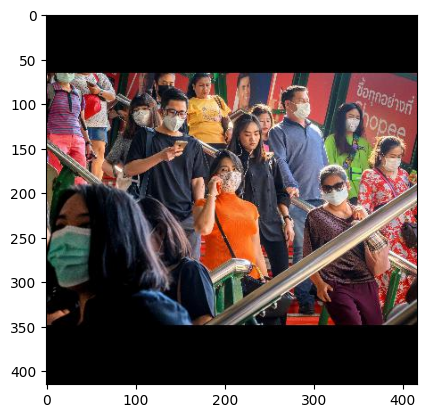

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/tensorflow-yolov4-tflite/images/-1x-1_jpg.rf.8d697c00929e06e6655c08835cc66c02.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
%cd /content/tensorflow-yolov4-tflite/

/content/tensorflow-yolov4-tflite


- core/config.py 설정값 커스텀데이터로 변경  
    - YOLO.CLASSES
    - TEST.ANNOT_PATH

In [ ]:
!python evaluate.py --weights ./yolov4-416 --annotation_path /content/mask_test.txt

2023-04-07 06:05:44.355428: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-07 06:05:45.813995: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-07 06:05:45.835253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 06:05:45.835476: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2023-04-07 06:05:45.835537: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-07 06:05:45.861377: I tensorflow/stream_executor/platform/default

In [ ]:
%cd /content/tensorflow-yolov4-tflite/mAP

/content/tensorflow-yolov4-tflite/mAP


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow 2.12.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.11.2 which is incompatible.
tensorflow 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.5

In [ ]:
!python main.py

88.13% = mask AP  
Traceback (most recent call last):
  File "/content/tensorflow-yolov4-tflite/mAP/main.py", line 620, in <module>
    fig.canvas.set_window_title('AP ' + class_name)
AttributeError: 'FigureCanvasAgg' object has no attribute 'set_window_title'
